Installation

Install tensorflow opencv-python mediapipe skealearn matplotlib


In [ ]:
# !pip install tensorflow opencv-python mediapipe sklearn matplotlib

In [ ]:
# !pip install mediapipe

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


In [2]:
mp_holistic = mp.solutions.holistic # holistice model
mp_drawing = mp.solutions.drawing_utils # drawing utilities 

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color coversion
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # color coversion
    return image, results


In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )# draw the face connection
    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )# draw the pose connection
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )# draw the face connection
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )# draw the face connection

In [5]:
# cap = cv2.VideoCapture(0)
# #setting the mediapipe model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: 
#     while cap.isOpened():
#         #read feed
#         ret, frame = cap.read()
#         # check if frame is empty
#         #make detection
#         image, results = mediapipe_detection(frame, holistic)
# #       qprint(results)
        
#         # draw landmarksq
#         draw_landmarks(image, results)
#         #show to screen
        
#         cv2.imshow("OpenCv Feed", image)
#         #break 
#         if cv2.waitKey(10) & 0xFF == ord("q"):
#             break
#     cap.release()
#     cv2.destroyAllWindows()

In [59]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
pose

In [7]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [61]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, left_hand, right_hand])

In [62]:
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
# if results.face_landmarks
# else np.zeros(1404)


In [63]:
# result_test = extract_keypoints(results)

In [64]:
# result_test

In [65]:
# np.save('0', result_test)

In [66]:
# np.load('0.npy')

In [67]:
# 468*3+33*4+21*3+21*3

In [5]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('SLDATA') 
actions = np.array(['I', 'Thanks', 'You', 'Hello','School', 'Jesus Christ', 'Chicken', 'Eat','Love'])

# Actions that we try to detect
#actions = np.array(['I', 'Thanks', 'You', 'Hello'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [6]:
for action in actions: 
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action,str(sequence)))
        except:
            pass


In [11]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     # NEW LOOP
#     # Loop through actions
#     for action in actions:
#         # Loop through sequences aka videos
#         for sequence in range(no_sequences):
#             # Loop through video length aka sequence length
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)

#                 # Draw landmarks
#                 draw_landmarks(image, results)
                
#                 # NEW Apply wait logic
#                 if frame_num == 0: 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(5000)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
                
#                 # NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
                    
#     cap.release()
#     cv2.destroyAllWindows()

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
label_map = {label:num for num, label in enumerate(actions)}

In [9]:
label_map

{'I': 0,
 'Thanks': 1,
 'You': 2,
 'Hello': 3,
 'School': 4,
 'Jesus Christ': 5,
 'Chicken': 6,
 'Eat': 7,
 'Love': 8}

In [10]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [11]:
np.array(sequences).shape

(270, 30, 1662)

In [12]:
np.array(labels).shape

(270,)

In [13]:
X = np.array(sequences)

In [14]:
X.shape

(270, 30, 1662)

In [15]:
y = to_categorical(labels).astype(int)

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (15% for testing)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Split the temp data into train and validation sets (15% of the original data for validation)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.17647, random_state=42)

# The number 0.17647 is calculated because 15% of 85% (the remaining data after the first split) is roughly 0.17647 or 17.647%


In [17]:
y_test.shape

(41, 9)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU
from tensorflow.keras.callbacks import TensorBoard

In [19]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [20]:
model = Sequential()
model.add(GRU(128, return_sequences=True, activation='tanh', input_shape=(30,1662)))
model.add(GRU(512, return_sequences=True, activation='tanh'))
model.add(GRU(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [21]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, GRU

# model = Sequential()

# # Input layer
# model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,1662)))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

# # Hidden layer 1
# model.add(LSTM(64, return_sequences=True, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

# # Hidden layer 2
# model.add(LSTM(32, return_sequences=True, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

# model.add(LSTM(16, return_sequences=False, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

# # # Hidden layer 3
# # model.add(LSTM(32, return_sequences=False, activation='tanh'))
# # model.add(Dropout(0.2))
# # model.add(BatchNormalization())

# # Fully connected layer 1
# model.add(Dense(128, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

# # Fully connected layer 2
# model.add(Dense(64, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

# # # Fully connected layer 3
# # model.add(Dense(32, activation='tanh'))
# # model.add(Dropout(0.2))
# # model.add(BatchNormalization())

# # # Fully connected layer 3
# # model.add(Dense(32, activation='tanh'))
# # model.add(Dropout(0.2))
# # model.add(BatchNormalization())

# # Output layer
# model.add(Dense(actions.shape[0], activation='softmax'))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 128)           688128    
                                                                 
 gru_1 (GRU)                 (None, 30, 512)           986112    
                                                                 
 gru_2 (GRU)                 (None, 64)                110976    
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 9)                 297       
                                                                 
Total params: 1,791,753
Trainable params: 1,791,753
Non-

In [23]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history=model.fit(X_train, y_train, epochs=60, callbacks=[tb_callback],validation_data=(X_val,y_val),batch_size=64)

Epoch 1/60
3/3 [==============================] - 7s 879ms/step - loss: 2.4977 - accuracy: 0.0957 - val_loss: 2.3348 - val_accuracy: 0.0732
Epoch 2/60
3/3 [==============================] - 1s 408ms/step - loss: 2.2087 - accuracy: 0.1915 - val_loss: 2.1239 - val_accuracy: 0.2927
Epoch 3/60
3/3 [==============================] - 1s 401ms/step - loss: 2.0549 - accuracy: 0.2234 - val_loss: 1.9728 - val_accuracy: 0.3659
Epoch 4/60
3/3 [==============================] - 1s 412ms/step - loss: 1.8426 - accuracy: 0.3777 - val_loss: 1.6372 - val_accuracy: 0.3659
Epoch 5/60
3/3 [==============================] - 1s 429ms/step - loss: 1.6565 - accuracy: 0.3830 - val_loss: 1.4671 - val_accuracy: 0.4878
Epoch 6/60
3/3 [==============================] - 1s 405ms/step - loss: 1.4890 - accuracy: 0.4149 - val_loss: 1.3657 - val_accuracy: 0.5366
Epoch 7/60
3/3 [==============================] - 1s 416ms/step - loss: 1.3824 - accuracy: 0.5585 - val_loss: 1.2462 - val_accuracy: 0.6098
Epoch 8/60
3/3 [====

3/3 [==============================] - 1s 419ms/step - loss: 0.0580 - accuracy: 0.9947 - val_loss: 0.1950 - val_accuracy: 0.9512
Epoch 60/60
3/3 [==============================] - 1s 423ms/step - loss: 0.0573 - accuracy: 0.9947 - val_loss: 0.1730 - val_accuracy: 0.9512


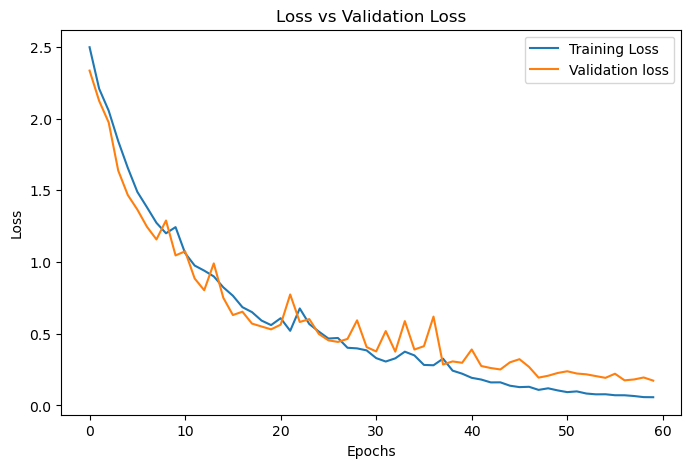

In [25]:
acc = history.history['loss']
val_acc = history.history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Validation Loss')
plt.legend()
plt.show()

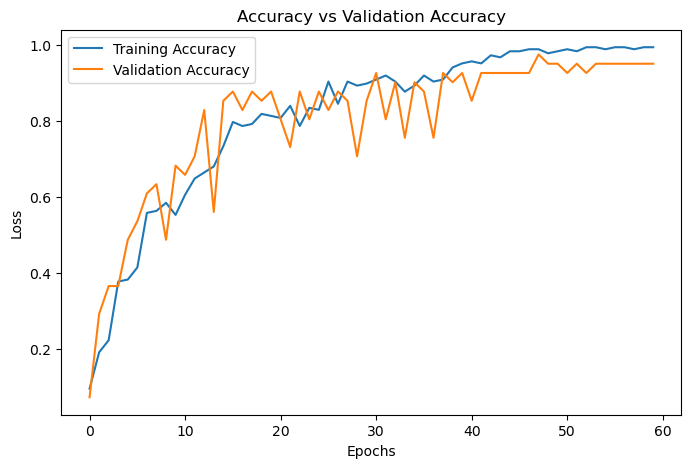

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 5))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy vs Validation Accuracy')
plt.legend()
plt.show()

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 128)           688128    
                                                                 
 gru_1 (GRU)                 (None, 30, 512)           986112    
                                                                 
 gru_2 (GRU)                 (None, 64)                110976    
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 9)                 297       
                                                                 
Total params: 1,791,753
Trainable params: 1,791,753
Non-

Defaulting to user installation because normal site-packages is not writeable


'apt-get' is not recognized as an internal or external command,
operable program or batch file.


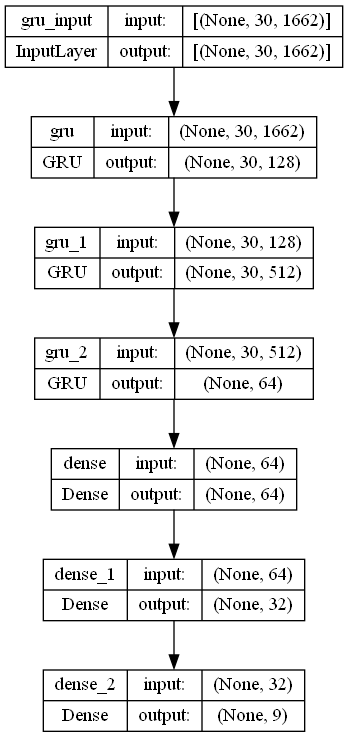

In [28]:
!pip install pydot
!apt-get install graphviz
from tensorflow.keras.utils import plot_model

# Generate the plot
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [29]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Test Loss: 0.4241909384727478
Test Accuracy: 0.9024389982223511


2/2 [==============================] - 5s 34ms/step


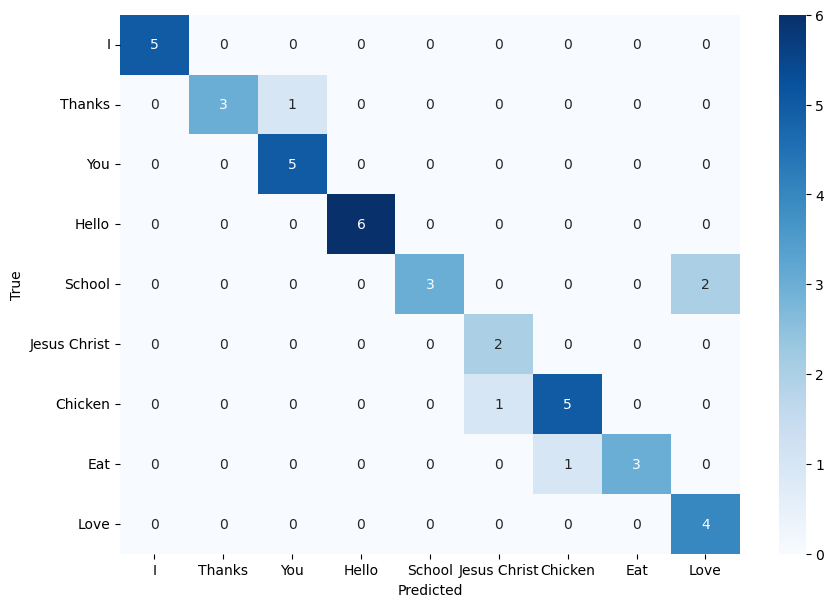

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Class names
# class_names = ['class1', 'class2', 'class3', ...]  # Replace this with your actual class names

# Get the model predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)


# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test_classes, y_pred_classes, target_names=actions))


NameError: name 'y_test_classes' is not defined

In [31]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

report = classification_report(y_test_classes, y_pred_classes, output_dict=True, target_names=actions)

for i, class_name in enumerate(actions):
    print(f"Class {class_name}")
    print(f"Sensitivity (Recall) : {report[class_name]['recall']}")
    print(f"Specificity : {report[class_name]['precision']}")  # precision can be considered as a kind of specificity

2/2 [==============================] - 1s 29ms/step
Class I
Sensitivity (Recall) : 1.0
Specificity : 1.0
Class Thanks
Sensitivity (Recall) : 0.75
Specificity : 1.0
Class You
Sensitivity (Recall) : 1.0
Specificity : 0.8333333333333334
Class Hello
Sensitivity (Recall) : 1.0
Specificity : 1.0
Class School
Sensitivity (Recall) : 0.8
Specificity : 1.0
Class Jesus Christ
Sensitivity (Recall) : 1.0
Specificity : 0.6666666666666666
Class Chicken
Sensitivity (Recall) : 0.8333333333333334
Specificity : 0.8333333333333334
Class Eat
Sensitivity (Recall) : 0.75
Specificity : 1.0
Class Love
Sensitivity (Recall) : 1.0
Specificity : 0.8


2/2 [==============================] - 0s 29ms/step


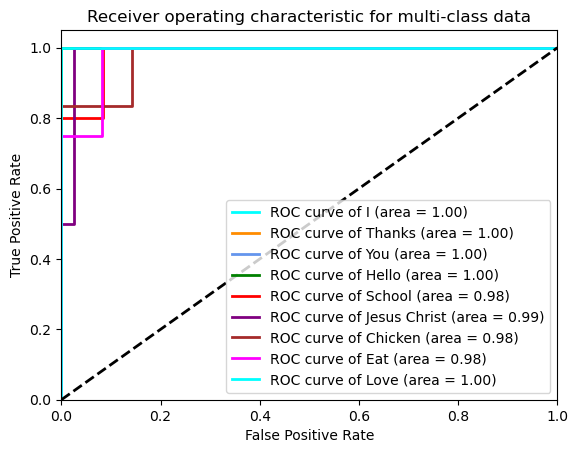

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from itertools import cycle

n_classes = len(actions)
# class_names = ["Class1", "Class2", "Class3", "Class4", "Class5", "Class6", "Class7", "Class8"] # adjust this to your class names

# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test_classes)
y_pred_bin = model.predict(X_test)  # You may need to adjust this line if your model's predict function name differs

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):  # n_classes is the number of your classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'magenta'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(actions[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()


C:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


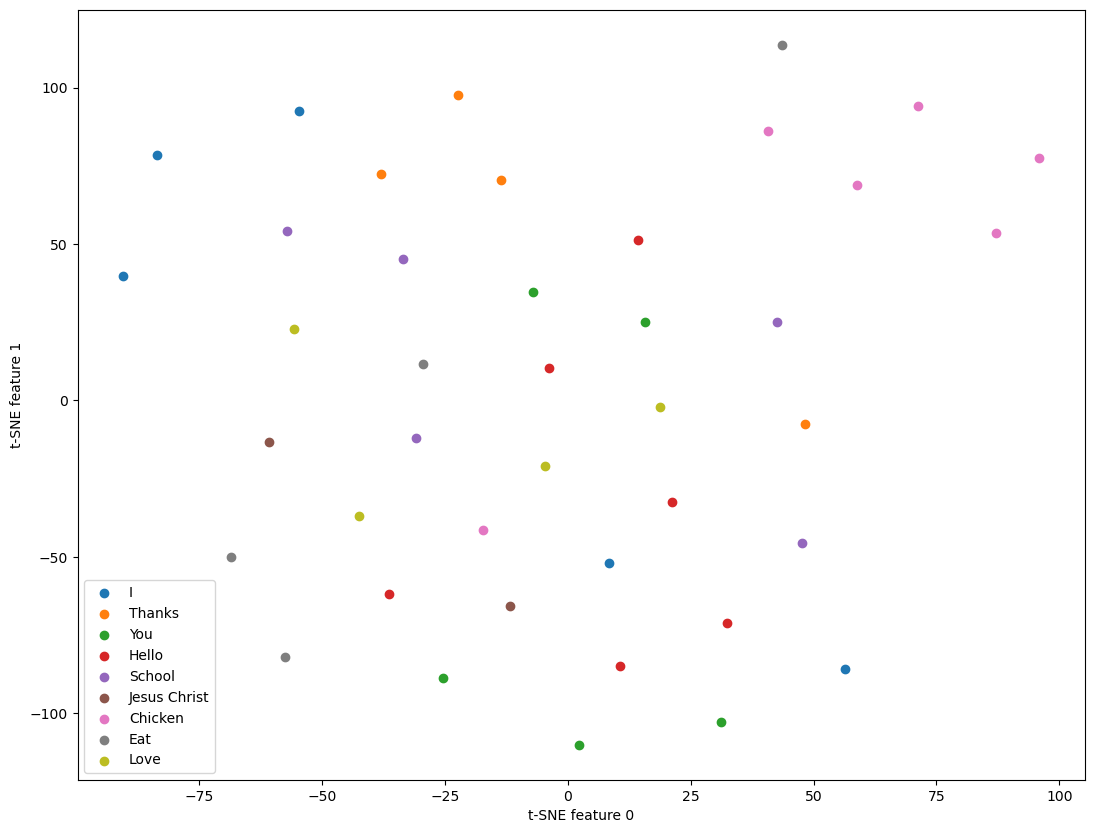

In [36]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Let's assume you want to visualize your X_test data
# You might want to take a subset if it's too large, as t-SNE can be time-consuming
X_subset = X_test[:500]
y_subset = np.argmax(y_test[:500], axis=1)
# Reshape the data from 3D to 2D
X_subset_flat = X_subset.reshape(X_subset.shape[0], -1)

# Now X_subset_flat is 2D (num_samples, num_timesteps * num_features)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
# Perform t-SNE
X_subset_tsne = tsne.fit_transform(X_subset_flat)


# Create a scatter plot with colors corresponding to the classes
plt.figure(figsize=(13,10))
for i in range(9):  # Adjust this range according to the number of classes you have
    plt.scatter(X_subset_tsne[y_subset == i, 0], X_subset_tsne[y_subset == i, 1], label=actions[i])
    
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.legend()
plt.show()

In [33]:
res = model.predict(X_test)

2/2 [==============================] - 0s 30ms/step


In [34]:
actions[np.argmax(res[4])]

'Chicken'

In [35]:
actions[np.argmax(y_test[4])]

'Chicken'

In [36]:
model.save('action_GRU.h5')

In [37]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [38]:
yhat = model.predict(X_test)

2/2 [==============================] - 0s 33ms/step


In [39]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [40]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[36,  0],
        [ 0,  5]],

       [[37,  0],
        [ 1,  3]],

       [[35,  1],
        [ 0,  5]],

       [[35,  0],
        [ 0,  6]],

       [[36,  0],
        [ 1,  4]],

       [[38,  1],
        [ 0,  2]],

       [[34,  1],
        [ 1,  5]],

       [[37,  0],
        [ 1,  3]],

       [[36,  1],
        [ 0,  4]]], dtype=int64)

In [41]:
accuracy_score(ytrue, yhat)

0.9024390243902439

In [42]:
from scipy import stats

In [55]:
from tensorflow.keras.models import load_model

model = load_model('action_GRU.h5')


In [56]:
colors = [(245,117,16), (117,245,16), (16,117,245),(255, 0, 0), (0, 255, 0), (0, 0, 255),(255, 0, 0), (0, 255, 0), (0, 0, 255)]
#colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Define colors with N elements

def prob_viz(res, actions, input_frame,colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2,)
        
    return output_frame

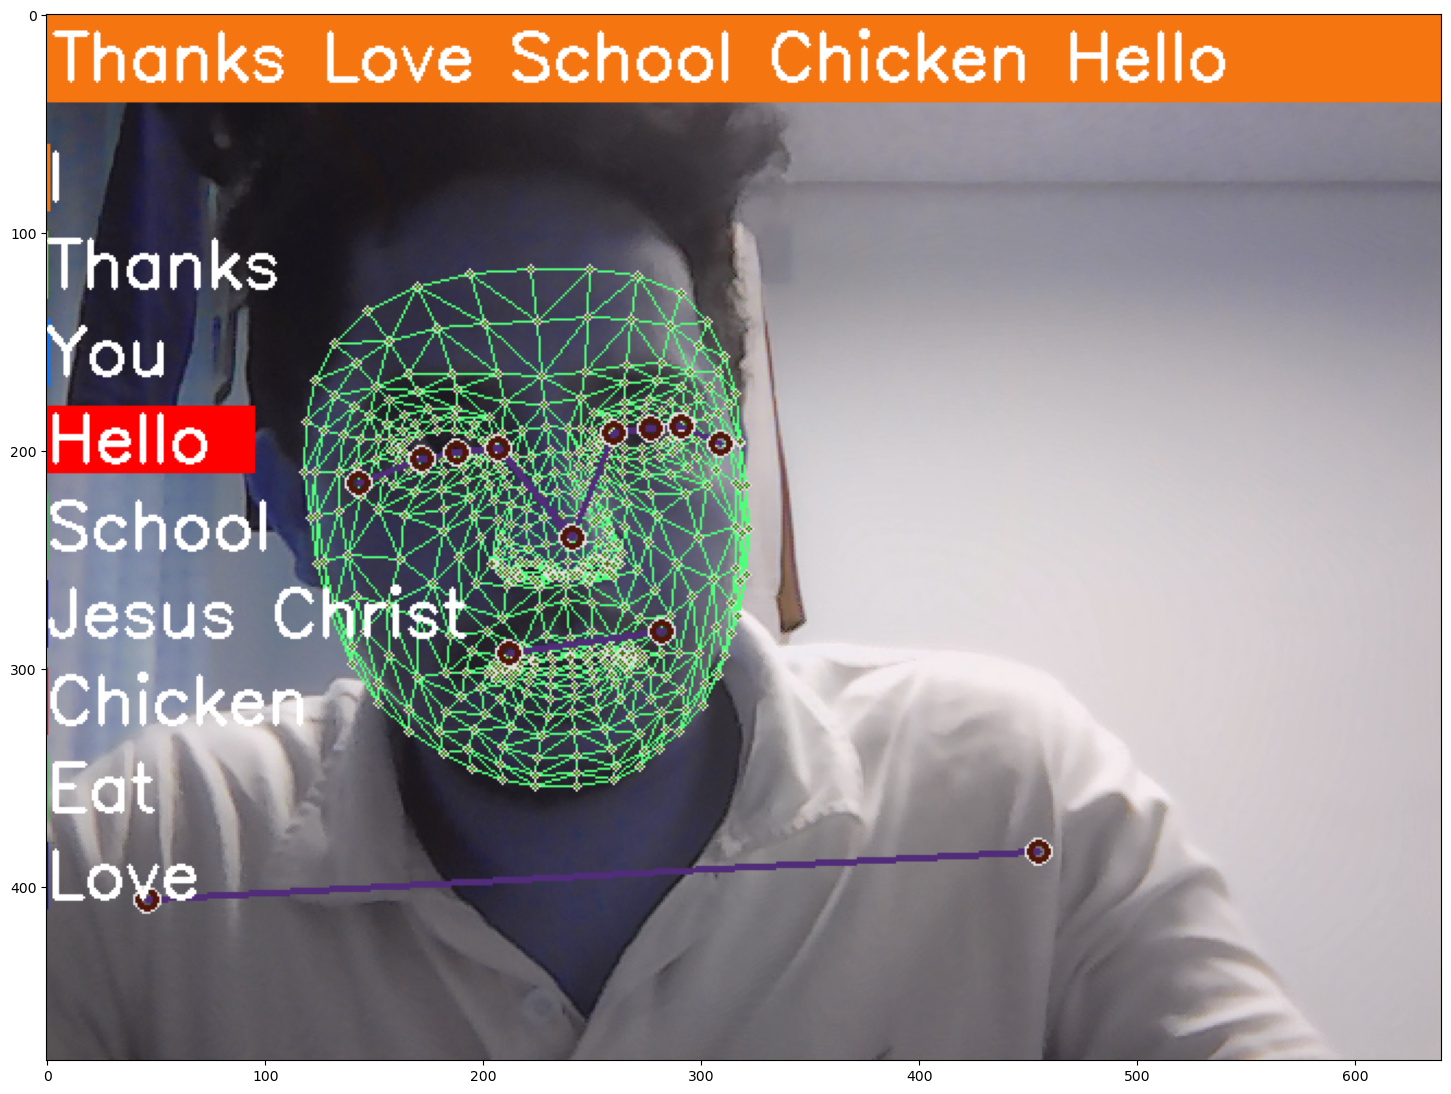

In [57]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [58]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 45ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 52ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 35ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
Thanks
<class 'media

1/1 [==============================] - 0s 38ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
Thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Thanks
<class 'media

1/1 [==============================] - 0s 34ms/step
Jesus Christ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
Jesus Christ
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Eat
<class 'mediapipe.pyth

1/1 [==============================] - 0s 33ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
Hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
You
<class 'mediapipe.python.solution_base

1/1 [==============================] - 0s 32ms/step
School
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
School
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
School
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
School
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
School
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
School
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
School
<class 'mediapipe.p

1/1 [==============================] - 0s 32ms/step
School
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
School
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
School
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
School
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
School
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
You
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
You
<class 'mediapipe.python.

1/1 [==============================] - 0s 33ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1

1/1 [==============================] - 0s 28ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
I
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1